In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
from IPython.display import display

In [2]:
data = joblib.load("train.joblib")
test_data = joblib.load(open("data/eval1.joblib", "rb"))
print(f"Training data shape: {data['data'].shape}, Test data shape: {test_data['data'].shape}")

Training data shape: (2200, 5828), Test data shape: (1000, 5828)


In [3]:
reshape_images = data['data'].reshape(-1, 2, 62, 47)
labels = data['target']
reshape_images.shape

(2200, 2, 62, 47)

(2200, 62, 94)


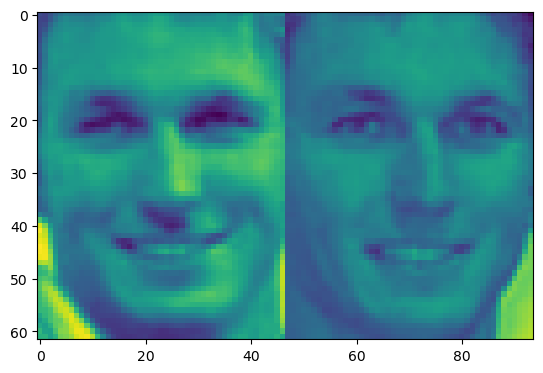

In [4]:
images = np.concatenate((reshape_images[:, 0], reshape_images[:, 1]), axis=2)
print(images.shape)
plt.imshow(images[0])
plt.show()

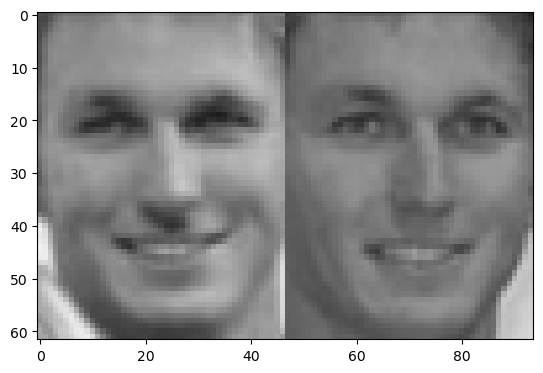

In [5]:
plt.imshow(Image.fromarray(images[0] * 255))

### CONVERT TO PIL

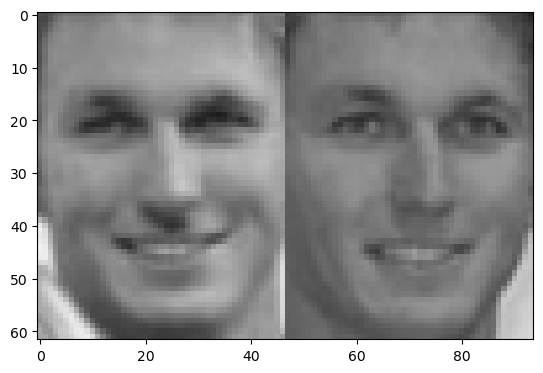

In [6]:
def numpy_to_pil(images_array):
    pil_images = []
    for i in range(images_array.shape[0]):
        img = Image.fromarray(images_array[i] * 255, mode='F')
        pil_images.append(img)
    return pil_images

pil_images = numpy_to_pil(images)
plt.imshow(pil_images[0])

### FLIP

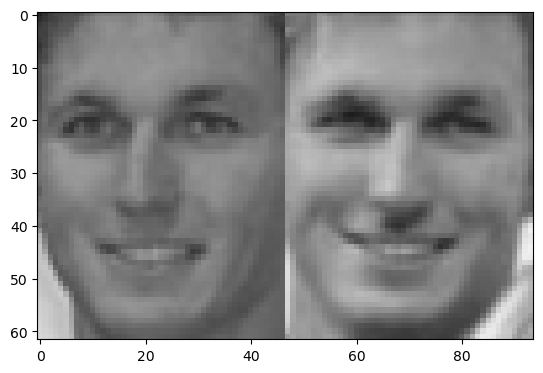

In [7]:
plt.imshow(pil_images[0].transpose(Image.FLIP_LEFT_RIGHT))

In [8]:
np.array(pil_images[0].transpose(Image.FLIP_LEFT_RIGHT)).max()

np.float32(240.66669)

### BRIGHTNESS

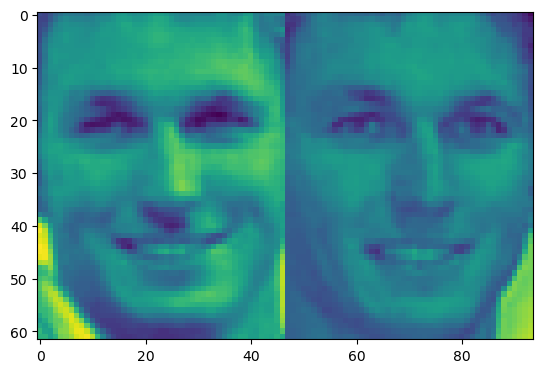

In [9]:
plt.imshow(ImageEnhance.Brightness(pil_images[0].convert('L')).enhance(0.5))

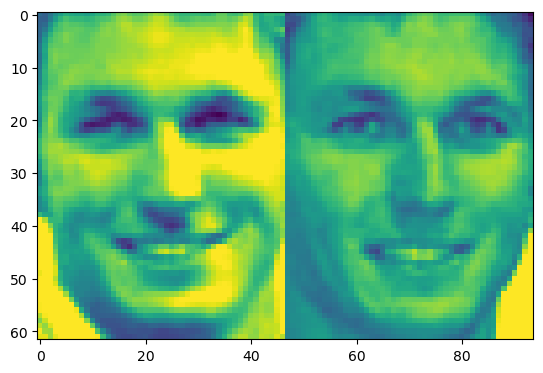

In [10]:
plt.imshow(ImageEnhance.Brightness(pil_images[0].convert('L')).enhance(1.5))

In [11]:
np.array(ImageEnhance.Brightness(pil_images[0].convert('L')).enhance(1.5)).max()

np.uint8(255)

### CONTRAST

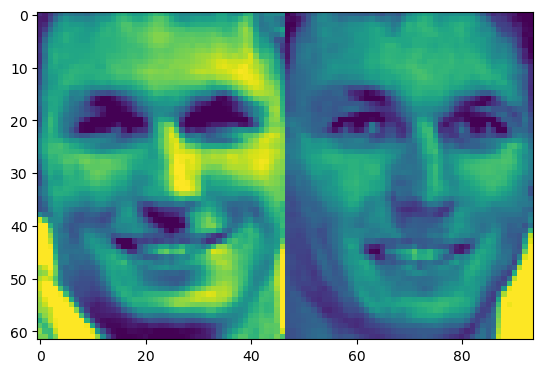

In [12]:
plt.imshow(ImageEnhance.Contrast(pil_images[0].convert('L')).enhance(2))

### EDGES

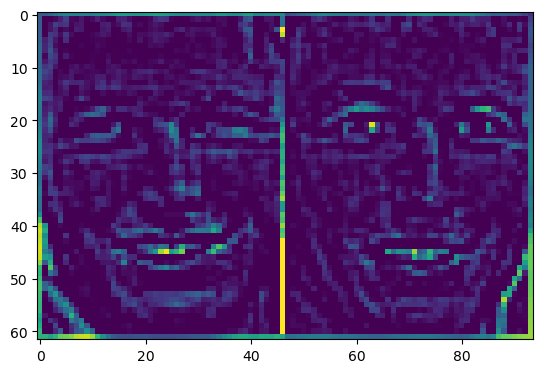

In [13]:
plt.imshow(pil_images[0].convert('L').filter(ImageFilter.FIND_EDGES))

In [14]:
np.array(pil_images[0].convert('L').filter(ImageFilter.FIND_EDGES)).max()

np.uint8(255)

### SHARPNESS

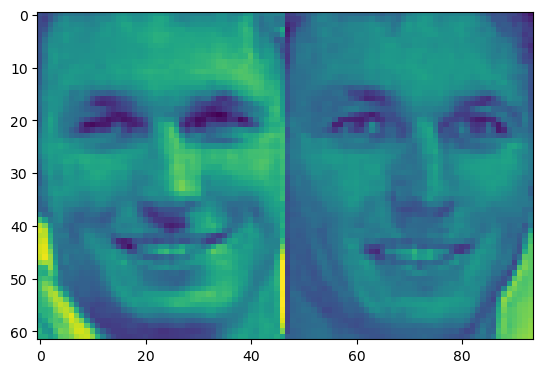

In [15]:
plt.imshow(ImageEnhance.Sharpness(pil_images[0].convert('L')).enhance(2))

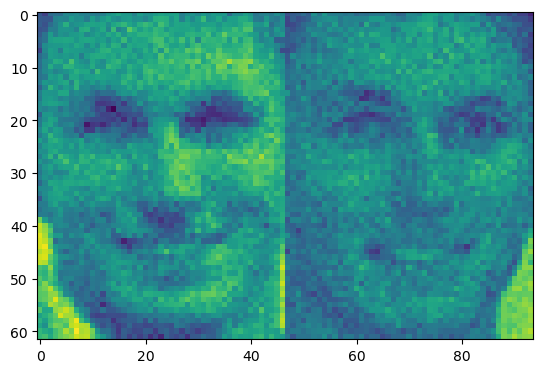

In [16]:
# Add random noise
noise_factor = 0.05
noise = np.random.randn(*images.shape) * noise_factor
noisy_image = np.array(images + noise)
plt.imshow(noisy_image[0])

### Blur

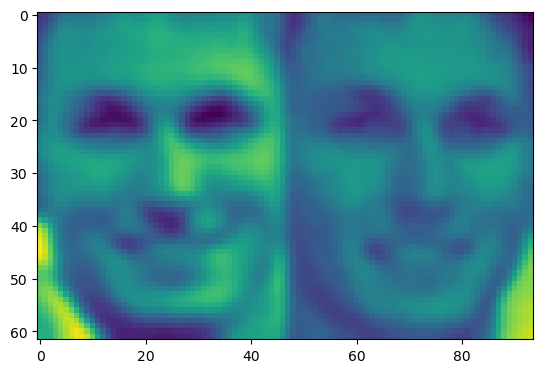

In [17]:
plt.imshow(pil_images[0].convert('L').filter(ImageFilter.GaussianBlur(1.2)))

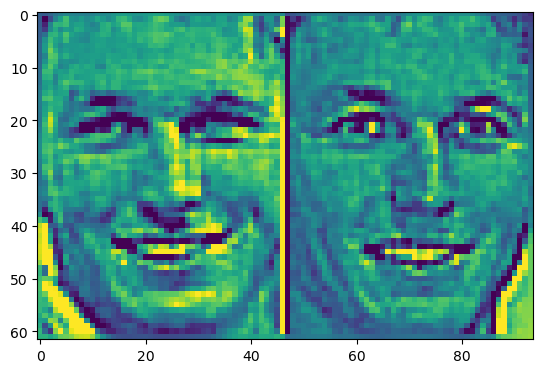

In [18]:
plt.imshow(pil_images[0].convert('L').filter(ImageFilter.EDGE_ENHANCE_MORE))

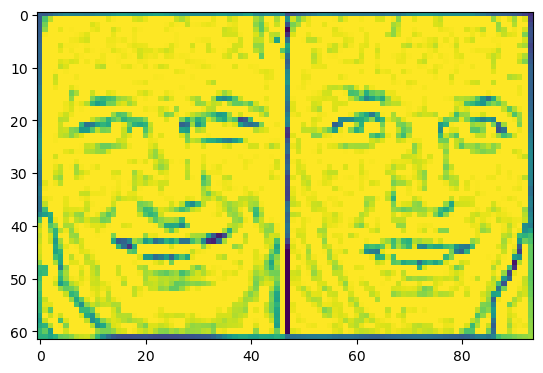

In [19]:
plt.imshow(pil_images[0].convert('L').filter(ImageFilter.CONTOUR()))

### RANDOM IMAGE AUGMENTATION

In [20]:
from random import randint, seed
seed(101)

def image_augmentation(pil_images: list):
    augmented_images = []
    for image in pil_images:
        if randint(1, 10) > 5:
            image = image.transpose(Image.FLIP_LEFT_RIGHT)

        if randint(1, 10) > 5:
            image = ImageEnhance.Brightness(image.convert('L')).enhance(1.5)

        if randint(1, 10) > 5:
            image = ImageEnhance.Contrast(image.convert('L')).enhance(2)

        if randint(1, 10) > 5:
            image = image.convert('L').filter(ImageFilter.FIND_EDGES)

        if randint(1, 10) > 5:
            image = image.convert('L').filter(ImageFilter.GaussianBlur(0.75))

        augmented_images.append(image)
        
    return augmented_images

In [21]:
from random import randint, seed
seed(101)

def image_augmentation1(pil_images: list):
    augmented_images = []
    for image in pil_images:
        if randint(1, 10) > 5:
            image = image.transpose(Image.FLIP_LEFT_RIGHT)

        if randint(1, 10) > 5:
            image = ImageEnhance.Brightness(image.convert('L')).enhance(1.5)

        if randint(1, 10) > 5:
            image = ImageEnhance.Contrast(image.convert('L')).enhance(2)

        if randint(1, 10) > 5:
            image = image.convert('L').filter(ImageFilter.FIND_EDGES)

        if randint(1, 10) > 5:
            image = ImageEnhance.Sharpness(image.convert('L')).enhance(2)

        augmented_images.append(image)
        
    return augmented_images

In [22]:
def image_augmentation2(pil_images: list):
    augmented_images = []  # Start with an empty list for augmented images
    
    for image in pil_images:
        # Randomly decide how many augmentations to apply per image
        augment_count = np.random.randint(2, 4)  # Apply between 2 to 4 augmentations to each image

        # Apply augmentations based on the random selection
        for _ in range(augment_count):
            random_number = np.random.randint(1, 11)  # Randomly choose an augmentation type
            
            # 1. Horizontal flip with 50% chance
            if random_number < 3:
                image = image.transpose(Image.FLIP_LEFT_RIGHT)
            
            # 2. Random brightness adjustment (20% chance)
            elif random_number in range(3, 5):
                image = ImageEnhance.Brightness(image.convert('L')).enhance(np.random.uniform(0.7, 1.5))

            # 3. Random contrast adjustment (20% chance)
            elif random_number in range(5, 7):
                image = ImageEnhance.Contrast(image.convert('L')).enhance(np.random.uniform(0.5, 2))

            # 4. Random sharpness adjustment (20% chance)
            elif random_number in range(7, 9):
                image = ImageEnhance.Sharpness(image.convert('L')).enhance(np.random.uniform(0.5, 2))

            # 5. Random noise injection (10% chance)
            elif random_number in range(9, 11):
                image = image.convert('L').filter(ImageFilter.FIND_EDGES)

            # Append the augmented image to the list
            augmented_images.append(image)
            
    pil_images.extend(augmented_images)
        
    return pil_images


In [23]:
def image_augmentation3(X, y):
    augmented_images = []  # List to store augmented images
    augmented_labels = []  # List to store corresponding labels
    y = list(y)

    for image, label in zip(X, y):
        augment_count = np.random.randint(2, 4)  # Apply between 2 to 4 augmentations
        original_image = image.copy()

        for _ in range(augment_count):
            random_number = np.random.randint(1, 13)  # Randomly choose an augmentation type
            
            if random_number < 3:
                image = original_image.transpose(Image.FLIP_LEFT_RIGHT)
            elif random_number in range(3, 5):
                image = ImageEnhance.Brightness(original_image.convert('L')).enhance(np.random.uniform(0.7, 1.5))
            elif random_number in range(5, 7):
                image = ImageEnhance.Contrast(original_image.convert('L')).enhance(np.random.uniform(0.5, 2))
            elif random_number in range(7, 9):
                image = ImageEnhance.Sharpness(original_image.convert('L')).enhance(np.random.uniform(0.5, 2))
            elif random_number in range(9, 11):
                image = original_image.convert('L').filter(ImageFilter.FIND_EDGES)
            elif random_number in range(11, 13):
                image = original_image.convert('L').filter(ImageFilter.GaussianBlur(np.random.uniform(0.7, 1)))

            augmented_images.append(image)  # Convert PIL image back to numpy array
            augmented_labels.append(label)
        
    X.extend(augmented_images)
    y.extend(augmented_labels)
    X = np.array(X) / 255
    y = np.array(y)
    
    return X, y


In [24]:
np.random.choice(2200, size=1100).size

1100

In [25]:
def image_augmentation4(X, y, augmentation_ratio=0.5):
    augmented_images = list(X)  # Start with original images
    augmented_labels = list(y)  # Start with original labels

    # Determine the number of images to augment based on augmentation_ratio
    total_images = len(X)
    num_augment = int(augmentation_ratio * total_images)

    for i in range(8):  # 6 augmentation types
        augment_indices = np.random.choice(total_images, size=num_augment, replace=False)
        
        for image_idx in augment_indices:
            original_image = X[image_idx]
            label = y[image_idx]
            
            # Apply specific augmentation logic
            if i == 0:  # Horizontal flip
                augmented_image = original_image.transpose(Image.FLIP_LEFT_RIGHT)
            elif i == 1:  # Brightness adjustment
                augmented_image = ImageEnhance.Brightness(original_image.convert('L')).enhance(np.random.uniform(0.7, 1.5))
            elif i == 2:  # Contrast adjustment
                augmented_image = ImageEnhance.Contrast(original_image.convert('L')).enhance(np.random.uniform(0.5, 2))
            elif i == 3:  # Sharpness adjustment
                augmented_image = ImageEnhance.Sharpness(original_image.convert('L')).enhance(np.random.uniform(0.5, 2))
            elif i == 4:  # Edge detection
                augmented_image = original_image.convert('L').filter(ImageFilter.FIND_EDGES)
            elif i == 5:  # Gaussian blur
                augmented_image = original_image.convert('L').filter(ImageFilter.GaussianBlur(np.random.uniform(0.7, 1)))
            elif i == 6:
                augmented_image = original_image.convert('L').filter(ImageFilter.EDGE_ENHANCE_MORE)
            elif i == 7:
                augmented_image = original_image.convert('L').filter(ImageFilter.CONTOUR)
                
            

            # Add augmented image and label to the dataset
            augmented_images.append(augmented_image)
            augmented_labels.append(label)
    
    # Normalize the images and convert labels to numpy arrays
    X = np.array([np.array(img) / 255 for img in augmented_images])  # Normalize images
    y = np.array(augmented_labels)
    
    return X, y


### PIPELINE

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

pipeline = Pipeline([
    ('reshape', FunctionTransformer(lambda x: x.reshape(-1, 2, 62, 47))),
    ('concat', FunctionTransformer(lambda x: np.concatenate((x[:, 0], x[:, 1]), axis=2))),
    ('convert_to_pil', FunctionTransformer(numpy_to_pil)),
    ('image_augmentation', FunctionTransformer(image_augmentation2)),
    ('normalize_array', FunctionTransformer(lambda x: np.array(x) / 255)),
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('pca', PCA(n_components=250))
])

In [27]:
def transform_test(X):
    X = X.reshape(-1, 2, 62, 47)
    X = np.concatenate((X[:, 0], X[:, 1]), axis=2)
    X = X.reshape(X.shape[0], -1)    
    return X

In [28]:
def numpy_to_pil(images_array):
    pil_images = []
    for i in range(images_array.shape[0]):
        img = Image.fromarray(images_array[i] * 255, mode='F')
        pil_images.append(img)
    return pil_images

def preprocessing(X, y, augmentation_ratio=0.5):
    X = X.reshape(-1, 2, 62, 47)
    X = np.concatenate((X[:, 0], X[:, 1]), axis=2)
    X = numpy_to_pil(X)
    X, y = image_augmentation4(X, y, augmentation_ratio)
    X = X.reshape(X.shape[0], -1)    
    return X, y

def transform_test(X):
    X = X.reshape(-1, 2, 62, 47)
    X = np.concatenate((X[:, 0], X[:, 1]), axis=2)
    X = X.reshape(X.shape[0], -1)    
    return X


X_train, y_train = preprocessing(data['data'], data['target'])
X_test = transform_test(test_data['data'])
y_test = test_data['target']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=70, random_state=101)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11000, 70) (11000,)
(1000, 70) (1000,)


### MODELS

In [29]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
knn = KNeighborsClassifier(n_neighbors=5)
pred = knn.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

rf = RandomForestClassifier(random_state = 101)
pred = rf.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

svc = SVC(probability = True, kernel='rbf', random_state=101)
pred = svc.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

0.544
0.625
0.633


In [117]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), solver='adam', max_iter=1000, activation='relu', early_stopping=True, random_state=101)
pred = mlp.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

0.673


In [ ]:
result = {}
for i in range(2,8):
    predictions = []
    i = i / 10
    X_train, y_train = preprocessing(data['data'], data['target'], i)
    X_test = transform_test(test_data['data'])
    y_test = test_data['target']

    pca = PCA(n_components=300)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    svc = SVC(probability = True)
    pred = svc.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64), solver='adam', max_iter=1000, activation='relu', early_stopping=True, random_state=101)
    pred = mlp.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=101)
    pred = gbc.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    cv = KFold(n_splits=3, shuffle=True, random_state=101)

    estimators = [('mlp', mlp), ('svc',svc), ('gbc', gbc)]#, ('voting_soft', voting_clf_soft)]

    stacking_clf = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=cv,
        n_jobs=-1
    )
    pred = stacking_clf.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    result[i] = predictions

In [ ]:
# 0-4
result

{0.2: [0.603, 0.605, 0.616, 0.615],
 0.3: [0.623, 0.615, 0.618, 0.628],
 0.4: [0.616, 0.618, 0.621, 0.63],
 0.5: [0.616, 0.624, 0.631, 0.63],
 0.6: [0.628, 0.621, 0.62, 0.633],
 0.7: [0.612, 0.615, 0.617, 0.623]}

In [ ]:
# 0-5
result

{0.2: [0.623, 0.623, 0.617, 0.626],
 0.3: [0.637, 0.614, 0.619, 0.626],
 0.4: [0.627, 0.613, 0.649, 0.615],
 0.5: [0.619, 0.635, 0.617, 0.639],
 0.6: [0.63, 0.629, 0.611, 0.625],
 0.7: [0.623, 0.621, 0.61, 0.634]}

In [ ]:
# 0-6
result

{0.2: [0.633, 0.634, 0.624, 0.646],
 0.3: [0.617, 0.622, 0.617, 0.63],
 0.4: [0.631, 0.611, 0.63, 0.61],
 0.5: [0.622, 0.612, 0.622, 0.614],
 0.6: [0.645, 0.628, 0.636, 0.639],
 0.7: [0.64, 0.621, 0.632, 0.623]}

In [ ]:
# 0-8
result

{0.2: [0.618, 0.592, 0.63, 0.609],
 0.3: [0.614, 0.616, 0.632, 0.622],
 0.4: [0.631, 0.614, 0.622, 0.619],
 0.5: [0.612, 0.603, 0.631, 0.611],
 0.6: [0.637, 0.631, 0.617, 0.638],
 0.7: [0.631, 0.671, 0.631, 0.664]}

In [109]:
result = {}
for i in [50, 75, 100, 125, 150, 175, 200, 300]:
    print(f'i: {i}')
    predictions = []
    X_train, y_train = preprocessing(data['data'], data['target'], 0.7)
    X_test = transform_test(test_data['data'])
    y_test = test_data['target']

    pca = PCA(n_components=i, random_state=101)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    svc = SVC(probability = True)
    pred = svc.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64), solver='adam', max_iter=1000, activation='relu', early_stopping=True, random_state=101)
    pred = mlp.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=101)
    pred = gbc.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    estimators = [('mlp', mlp), ('svc',svc), ('gbc', gbc)]
    cv = KFold(n_splits=3, shuffle=True, random_state=101)
    
    stacking_clf = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=cv,
        n_jobs=-1
    )
    pred = stacking_clf.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    print(f'At Iteration {i}: {predictions}')
    
    result[i] = predictions

i: 50
At Iteration 50: [0.633, 0.646, 0.629, 0.645]
i: 75
At Iteration 75: [0.643, 0.674, 0.639, 0.675]
i: 100
At Iteration 100: [0.64, 0.668, 0.635, 0.675]
i: 125
At Iteration 125: [0.628, 0.627, 0.633, 0.633]
i: 150
At Iteration 150: [0.629, 0.659, 0.63, 0.658]
i: 175
At Iteration 175: [0.626, 0.661, 0.637, 0.66]
i: 200
At Iteration 200: [0.631, 0.648, 0.632, 0.649]
i: 300
At Iteration 300: [0.622, 0.639, 0.633, 0.643]


In [33]:
result = {}
for i in [65, 70, 75, 80, 85, 90, 95, 100]:
    print(f'i: {i}')
    predictions = []
    X_train, y_train = preprocessing(data['data'], data['target'], 0.7)
    X_test = transform_test(test_data['data'])
    y_test = test_data['target']

    pca = PCA(n_components=i, random_state=101)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    svc = SVC(probability = True)
    pred = svc.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64), solver='adam', max_iter=1000, activation='relu', early_stopping=True, random_state=101)
    pred = mlp.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=101)
    pred = gbc.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    estimators = [('mlp', mlp), ('svc',svc), ('gbc', gbc)]
    cv = KFold(n_splits=3, shuffle=True, random_state=101)
    
    stacking_clf = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=cv,
        n_jobs=-1
    )
    pred = stacking_clf.fit(X_train,y_train).predict(X_test)
    predictions.append(accuracy_score(y_test, pred))
    
    print(f'At Iteration {i}: {predictions}')
    
    result[i] = predictions

i: 65
At Iteration 65: [0.635, 0.66, 0.627, 0.66]
i: 70
At Iteration 70: [0.651, 0.677, 0.628, 0.684]
i: 75
At Iteration 75: [0.641, 0.66, 0.631, 0.662]
i: 80
At Iteration 80: [0.645, 0.669, 0.623, 0.674]
i: 85
At Iteration 85: [0.644, 0.676, 0.637, 0.676]
i: 90
At Iteration 90: [0.638, 0.66, 0.63, 0.661]
i: 95
At Iteration 95: [0.625, 0.661, 0.622, 0.665]
i: 100
At Iteration 100: [0.641, 0.639, 0.641, 0.645]


In [ ]:
result

{100: [0.63, 0.635, 0.639, 0.645],
 300: [0.633, 0.63, 0.631, 0.634],
 500: [0.631, 0.62, 0.638, 0.631],
 700: [0.637, 0.632, 0.618, 0.635],
 1000: [0.625, 0.62, 0.621, 0.622],
 1500: [0.629, 0.618, 0.635, 0.627],
 2500: [0.611, 0.595, 0.622, 0.611],
 3000: [0.631, 0.626, 0.628, 0.632]}

In [112]:
param_grid = {
    'C': [0.1],
    'gamma': [0.01],
    'kernel': ['rbf']
}
cv = KFold(n_splits=3, shuffle=True, random_state=101)

best_svc = GridSearchCV(
    SVC(random_state=101, probability=True),
    param_grid,
    refit=True,
    cv=cv,
    verbose=3
)

best_svc.fit(X_train, y_train)
pred = best_svc.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred))
print(best_svc.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.632 total time= 2.0min
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.672 total time= 2.1min
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.655 total time= 2.3min
0.626
{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
param_grid = {
    'C': np.logspace(0, 2, 3),
    'gamma': np.logspace(-3, -1, 3),
    'kernel': ['rbf']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

best_svc = RandomizedSearchCV(
    SVC(random_state=101, probability=True),
    param_grid,
    refit=True,
    cv=cv,
    verbose=3,
    n_jobs=-1
)

best_svc.fit(X_train, y_train)
pred = best_svc.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred))
print(best_svc.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 5/5] END ..C=100.0, gamma=0.001, kernel=rbf;, score=0.850 total time= 3.7min
[CV 2/5] END ..C=100.0, gamma=0.001, kernel=rbf;, score=0.854 total time= 3.7min
[CV 1/5] END ..C=100.0, gamma=0.001, kernel=rbf;, score=0.876 total time= 3.9min
[CV 3/5] END ..C=100.0, gamma=0.001, kernel=rbf;, score=0.870 total time= 3.9min
[CV 4/5] END ..C=100.0, gamma=0.001, kernel=rbf;, score=0.861 total time= 3.9min
[CV 1/5] END ...C=100.0, gamma=0.01, kernel=rbf;, score=0.818 total time= 2.8min
[CV 2/5] END ...C=100.0, gamma=0.01, kernel=rbf;, score=0.806 total time= 2.9min
[CV 3/5] END ...C=100.0, gamma=0.01, kernel=rbf;, score=0.798 total time= 2.8min
[CV 3/5] END ...C=1.0, gamma=0.001, kernel=poly;, score=0.845 total time= 7.0min
[CV 2/5] END ...C=1.0, gamma=0.001, kernel=poly;, score=0.836 total time= 7.0min
[CV 1/5] END ...C=1.0, gamma=0.001, kernel=poly;, score=0.852 total time= 7.0min
[CV 4/5] END ...C=100.0, gamma=0.01, kernel=rbf;

/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 4/5] END ....C=100.0, gamma=0.1, kernel=rbf;, score=0.692 total time= 2.6min
[CV 5/5] END ....C=100.0, gamma=0.1, kernel=rbf;, score=0.686 total time= 2.5min
[CV 5/5] END ....C=1.0, gamma=0.01, kernel=poly;, score=0.828 total time= 7.9min
[CV 4/5] END ....C=1.0, gamma=0.01, kernel=poly;, score=0.830 total time= 8.4min
[CV 1/5] END ..C=10.0, gamma=0.001, kernel=poly;, score=0.840 total time= 8.1min
[CV 2/5] END ..C=10.0, gamma=0.001, kernel=poly;, score=0.832 total time= 7.8min
[CV 3/5] END ..C=10.0, gamma=0.001, kernel=poly;, score=0.842 total time= 7.7min
[CV 4/5] END ..C=10.0, gamma=0.001, kernel=poly;, score=0.830 total time= 7.7min
[CV 5/5] END ..C=10.0, gamma=0.001, kernel=poly;, score=0.829 total time= 7.4min
[CV 1/5] END .....C=1.0, gamma=0.1, kernel=poly;, score=0.841 total time= 7.5min
[CV 3/5] END .....C=1.0, gamma=0.1, kernel=poly;, score=0.839 total time= 7.3min
[CV 2/5] END .....C=1.0, gamma=0.1, kernel=poly;, score=0.829 total time= 7.4min
[CV 4/5] END .....C=1.0, gam

In [105]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
cv = KFold(n_splits=3, shuffle=True, random_state=101)

best_svc = GridSearchCV(
    SVC(random_state=101, probability=True),
    param_grid,
    refit=True,
    cv=cv,
    verbose=3
)

best_svc.fit(X_train, y_train)
pred = best_svc.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred))
print(best_svc.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END .......C=0.01, gamma=1, kernel=rbf;, score=0.489 total time= 1.1min
[CV 2/3] END .......C=0.01, gamma=1, kernel=rbf;, score=0.491 total time= 1.1min
[CV 3/3] END .......C=0.01, gamma=1, kernel=rbf;, score=0.499 total time= 1.1min
[CV 1/3] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.489 total time= 1.1min
[CV 2/3] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.491 total time= 1.1min
[CV 3/3] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.499 total time= 1.1min
[CV 1/3] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.489 total time= 1.1min
[CV 2/3] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.491 total time= 1.1min
[CV 3/3] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.499 total time= 1.1min
[CV 1/3] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.489 total time= 1.1min
[CV 2/3] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.491 total time= 1.1min
[CV 3/3] END ...C=0.01, gamma=0.001, kernel=rbf;

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}


cv = KFold(n_splits=3, shuffle=True, random_state=101)

best_svc = GridSearchCV(
    SVC(random_state=101, probability=True),
    param_grid,
    refit=True,
    cv=3,
    verbose=3,
    n_jobs=-1
)

best_svc.fit(X_train, y_train)
pred = best_svc.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred))
print(best_svc.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END ........C=100, gamma=1, kernel=rbf;, score=0.744 total time= 5.1min
[CV 2/3] END ........C=100, gamma=1, kernel=rbf;, score=0.710 total time= 4.6min
[CV 3/3] END ........C=100, gamma=1, kernel=rbf;, score=0.649 total time= 2.6min
[CV 1/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.803 total time=  40.5s
[CV 2/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.841 total time=  38.1s
[CV 3/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.715 total time=  37.1s
[CV 1/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.865 total time=  32.4s
[CV 2/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.898 total time=  33.6s
[CV 3/3] END .....C=100, gamma=0.01, kernel=rbf;, score=0.812 total time=  43.0s
[CV 1/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.858 total time=  25.4s
[CV 2/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.899 total time=  30.9s
[CV 3/3] END ....C=100, gamma=0.001, kernel=rbf;

In [129]:
param_distributions = {
    'C': [10],
    'gamma': [1e-4],
    'kernel': ['rbf']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

best_svc2 = RandomizedSearchCV(
    estimator=SVC(random_state=101, probability=True),
    param_distributions=param_distributions,
    n_iter=50,
    cv=cv,
    verbose=3,
    scoring='accuracy',
    random_state=101,
    n_jobs=-1,
    return_train_score=True
)

best_svc2.fit(X_train, y_train)
pred = best_svc2.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred))
print(best_svc2.best_params_)

/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END C=10, gamma=0.0001, kernel=rbf;, score=(train=0.831, test=0.759) total time=  36.6s
[CV 1/5] END C=10, gamma=0.0001, kernel=rbf;, score=(train=0.832, test=0.750) total time=  37.3s
[CV 5/5] END C=10, gamma=0.0001, kernel=rbf;, score=(train=0.830, test=0.749) total time=  37.1s
[CV 3/5] END C=10, gamma=0.0001, kernel=rbf;, score=(train=0.827, test=0.775) total time=  37.5s
[CV 4/5] END C=10, gamma=0.0001, kernel=rbf;, score=(train=0.831, test=0.758) total time=  38.0s
0.647
{'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}


In [114]:
param_grid = {
    'hidden_layer_sizes': [(75, 50), (75, 50, 25), (50, 25)],
    'activation': ['relu', 'logistic'],
    'alpha': [1e-6, 1e-4, 1e-2],
    'max_iter': [1000, 1500, 2000],
    'solver': ['adam']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

best_mlp = RandomizedSearchCV(
    MLPClassifier(random_state=101, early_stopping=True, validation_fraction=0.1),
    param_distributions=param_grid,
    refit=True,
    cv=cv,
    n_jobs=-1
)
best_mlp.fit(X_train, y_train)
pred = best_mlp.best_estimator_.predict(X_test)
print(f"{accuracy_score(y_test, pred)}")
print(f"{best_mlp.best_params_}")

0.672
{'solver': 'adam', 'max_iter': 2000, 'hidden_layer_sizes': (75, 50), 'alpha': 1e-06, 'activation': 'relu'}


In [37]:
param_grid = {
    'hidden_layer_sizes': [(75, 50), (75, 50, 25), (50, 25)],
    'activation': ['relu'],
    'alpha': [1e-2],
    'max_iter': [1000, 1500, 2000],
    'solver': ['adam']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

best_mlp = RandomizedSearchCV(
    MLPClassifier(random_state=101, early_stopping=True, validation_fraction=0.1),
    param_distributions=param_grid,
    refit=True,
    cv=cv,
    n_jobs=-1
)
best_mlp.fit(X_train, y_train)
pred = best_mlp.best_estimator_.predict(X_test)
print(f"{accuracy_score(y_test, pred)}")
print(f"{best_mlp.best_params_}")

/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.668
{'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': (75, 50), 'alpha': 0.01, 'activation': 'relu'}


In [121]:
param_grid = {
    'hidden_layer_sizes': [(75, 50), (75, 50, 25), (80, 50)],
    'activation': ['relu'],
    'alpha': [1e-8],
    'max_iter': [1000, 1500, 2000],
    'solver': ['adam']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

best_mlp2 = RandomizedSearchCV(
    MLPClassifier(random_state=101, early_stopping=True, validation_fraction=0.1),
    param_distributions=param_grid,
    refit=True,
    cv=cv,
    n_jobs=-1
)
best_mlp2.fit(X_train, y_train)
pred = best_mlp2.best_estimator_.predict(X_test)
print(f"{accuracy_score(y_test, pred)}")
print(f"{best_mlp.best_params_}")

/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.672
{'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': (128, 84, 48), 'alpha': 1e-08, 'activation': 'relu'}


In [134]:
param_grid = {
    'hidden_layer_sizes': [(128, 84, 48)],
    'activation': ['relu'],
    'alpha': [1e-8],
    'max_iter': [1000],
    'solver': ['adam']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

best_mlp = RandomizedSearchCV(
    MLPClassifier(random_state=101, early_stopping=True, validation_fraction=0.1),
    param_distributions=param_grid,
    refit=True,
    cv=cv,
    n_jobs=-1
)
best_mlp.fit(X_train, y_train)
pred = best_mlp.best_estimator_.predict(X_test)
print(f"{accuracy_score(y_test, pred)}")
print(f"{best_mlp.best_params_}")

0.681
{'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': (128, 84, 48), 'alpha': 1e-08, 'activation': 'relu'}


In [133]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
best = 0
best_node = []
for i in range(63, 129):
    for j in range(32, 85, 2):
        param_grid = {
            'hidden_layer_sizes': [(i, j)], # 68.1 (128, 84, 48),
            'activation': ['relu'],
            'alpha': [1e-8],
            'max_iter': [1000],
            'solver': ['adam']
        }
        # cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=101)

        best_mlp = RandomizedSearchCV(
            MLPClassifier(random_state=101, early_stopping=True, validation_fraction=0.1),
            param_distributions=param_grid,
            refit=True,
            n_jobs=-1
        )
        best_mlp.fit(X_train, y_train)
        pred = best_mlp.best_estimator_.predict(X_test)
        score = accuracy_score(y_test, pred)
        print(i, j, score)
        if score > best:
            best = score
            best_node = [i, j]

print(best, best_node)

63 32 0.651
63 34 0.641


KeyboardInterrupt: 

In [147]:
param_grid = {
    'learning_rate': [1e-3, 1e-2, 1e-1, 1, 10],
    'n_estimators': [100, 250, 500, 750],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

best_gbc = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=101),
    param_distributions=param_grid,
    cv=cv,
    verbose=3,
    scoring='accuracy',
    n_jobs=-1
)

best_gbc.fit(X_train, y_train)
pred = best_gbc.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred))
print(best_gbc.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=250, subsample=1.0;, score=0.608 total time= 1.9min
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=250, subsample=1.0;, score=0.620 total time= 1.9min
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=250, subsample=1.0;, score=0.628 total time= 1.9min
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=250, subsample=1.0;, score=0.609 total time= 1.9min
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=250, subsample=1.0;, score=0.617 total time= 1.9min
[CV 1/5] END learning_rate=10, max_depth=3, n_estimators=750, subsample=0.8;, score=0.451 total time= 2.9min
[CV 5/5] END learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0;, score=0.678 total time= 5.2min
[CV 4/5] END learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0;, score=0.677 total time= 5.3min
[CV 3/5] END learning_rate=0.001, max_depth=7,

In [43]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

param_grid = {
    'learning_rate': [1e-4, 5e-4, 1e-3, 5e-3, 1e-2],
    'n_estimators': [100, 250, 500, 750, 1000],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'loss': ['deviance', 'exponential']
}
# Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=101)

# Initialize RandomizedSearchCV
best_gbc = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    cv=cv,
    scoring='accuracy',
    verbose=3,
    random_state=101,
    n_jobs=-1,
    return_train_score=True  # To analyze training vs. validation scores
)

# Fit the model
best_gbc.fit(X_train, y_train)

# Predict and evaluate
pred_gbc = best_gbc.best_estimator_.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, pred_gbc))
print("Best Parameters:", best_gbc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=0.001, loss=exponential, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, subsample=0.6;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END learning_rate=0.001, loss=exponential, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, subsample=0.6;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END learning_rate=0.001, loss=exponential, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, subsample=0.6;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END learning_rate=0.0005, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=250, subsample=0.7;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END learning_rate=0.0005, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_sampl

/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
305 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
76 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_co

Gradient Boosting Classifier Accuracy: 0.657
Best Parameters: {'subsample': 0.8, 'n_estimators': 750, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'loss': 'exponential', 'learning_rate': 0.01}


In [38]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

param_grid = {
    'learning_rate': [1e-4, 5e-4, 1e-3, 5e-3, 1e-2],
    'n_estimators': [100, 250, 500, 750, 1000],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'loss': ['deviance', 'exponential']
}
# Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=101)

# Initialize RandomizedSearchCV
best_gbc = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    cv=cv,
    scoring='accuracy',
    verbose=3,
    random_state=101,
    n_jobs=-1,
    return_train_score=True  # To analyze training vs. validation scores
)

# Fit the model
best_gbc.fit(X_train, y_train)

# Predict and evaluate
pred_gbc = best_gbc.best_estimator_.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, pred_gbc))
print("Best Parameters:", best_gbc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 2/5] END learning_rate=0.001, loss=exponential, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, subsample=0.6;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END learning_rate=0.001, loss=exponential, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, subsample=0.6;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END learning_rate=0.001, loss=exponential, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, subsample=0.6;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END learning_rate=0.0005, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=250, subsample=0.7;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END learning_rate=0.001, loss=exponential, max_depth=4, max_features=auto, min_samples_leaf=4, min_sam

/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
305 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_co

Gradient Boosting Classifier Accuracy: 0.658
Best Parameters: {'subsample': 0.8, 'n_estimators': 750, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'loss': 'exponential', 'learning_rate': 0.01}


In [117]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

param_grid = {
    'learning_rate': [1e-4, 1e-3, 1e-2],
    'n_estimators': [100, 250, 500, 750, 1000],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'loss': ['log_loss', 'exponential']
}

# Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=101)

# Initialize RandomizedSearchCV
best_gbc2 = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    cv=cv,
    scoring='accuracy',
    verbose=5,
    random_state=101,
    n_jobs=-1,
    return_train_score=True  # To analyze training vs. validation scores
)

# Fit the model
best_gbc2.fit(X_train, y_train)

# Predict and evaluate
pred_gbc = best_gbc2.best_estimator_.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, pred_gbc))
print("Best Parameters:", best_gbc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 2/5] END learning_rate=0.001, loss=exponential, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=0.7;, score=(train=0.841, test=0.753) total time=   4.5s
[CV 4/5] END learning_rate=0.001, loss=exponential, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=0.7;, score=(train=0.840, test=0.743) total time=   4.6s
[CV 5/5] END learning_rate=0.001, loss=exponential, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=0.7;, score=(train=0.846, test=0.756) total time=   4.6s
[CV 1/5] END learning_rate=0.001, loss=exponential, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=0.7;, score=(train=0.841, test=0.731) total time=   4.6s
[CV 3/5] END learning_rate=0.001, loss=exponential, max_depth=7, max_features=sqrt, min_samples_l

In [116]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

param_grid = {
    'learning_rate': [1e-4, 1e-3, 1e-2],
    'n_estimators': [500, 750, 1000],
    'max_depth': [5, 6, 7],
}
# Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=101)

# Initialize RandomizedSearchCV
best_gbc = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    cv=cv,
    scoring='accuracy',
    verbose=3,
    random_state=101,
    n_jobs=-1,
    return_train_score=True  # To analyze training vs. validation scores
)

# Fit the model
best_gbc.fit(X_train, y_train)

# Predict and evaluate
pred_gbc = best_gbc.best_estimator_.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, pred_gbc))
print("Best Parameters:", best_gbc.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 1/5] END learning_rate=0.0001, max_depth=6, n_estimators=500;, score=(train=0.661, test=0.625) total time= 5.0min
[CV 2/5] END learning_rate=0.0001, max_depth=6, n_estimators=500;, score=(train=0.660, test=0.623) total time= 5.0min
[CV 5/5] END learning_rate=0.0001, max_depth=6, n_estimators=500;, score=(train=0.675, test=0.619) total time= 5.1min
[CV 3/5] END learning_rate=0.0001, max_depth=6, n_estimators=500;, score=(train=0.685, test=0.622) total time= 5.1min
[CV 4/5] END learning_rate=0.0001, max_depth=6, n_estimators=500;, score=(train=0.667, test=0.634) total time= 5.1min
[CV 1/5] END learning_rate=0.0001, max_depth=6, n_estimators=750;, score=(train=0.669, test=0.642) total time= 7.6min
[CV 2/5] END learning_rate=0.0001, max_depth=6, n_estimators=750;, score=(train=0.664, test=0.626) total time= 7.7min
[CV 3/5] END learning_rate=0.0001, max_depth=6, n_estimators=750;, score=(train=0.691, test=0.630) total time= 7.7min
[CV 5/5] END learning_rate=0.0001, max_depth=6, n_estima

KeyboardInterrupt: 

In [ ]:
best = 0
n_n = 0
for i in range(1, 100):    
    param_grid = {
        'n_neighbors': [63],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto'],
        'leaf_size': [1],
        'p': [1, 2],}

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

    best_knn = GridSearchCV(
        KNeighborsClassifier(),
        param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1
    )

    best_knn.fit(X_train, y_train)
    pred = best_knn.best_estimator_.predict(X_test)
    # print(accuracy_score(y_test, pred))
    # print(best_knn.best_params_)
    score = accuracy_score(y_test, pred)
    if score > best:
        best = score
        n_n = i

print(best, n_n)

0.622 1


In [114]:
best = 0
n_n = 0
for i in range(100, 1100, 33):    
    param_grid = {
        'n_neighbors': [i],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto'],
        'leaf_size': [1],
        'p': [1, 2],}

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

    best_knn = GridSearchCV(
        KNeighborsClassifier(),
        param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1
    )

    best_knn.fit(X_train, y_train)
    pred = best_knn.best_estimator_.predict(X_test)
    # print(accuracy_score(y_test, pred))
    # print(best_knn.best_params_)
    score = accuracy_score(y_test, pred)
    if score > best:
        best = score
        n_n = i

print(best, n_n)

0.597 100


In [38]:
X_train

array([[-0.47697167, -2.39488025,  3.01299261, ...,  0.07993488,
        -0.09280763, -0.21674284],
       [ 2.6470763 , -7.10882141, -0.48137408, ...,  0.20361502,
         0.09274828, -0.03457125],
       [-2.85586012,  4.30927577, -0.03534365, ...,  0.30233175,
         0.07264612,  0.04994187],
       ...,
       [30.55843418,  0.91438656,  4.77390641, ...,  0.31755162,
        -0.76115822, -0.17223901],
       [31.30817513,  0.1605108 ,  4.50606648, ..., -0.24897733,
        -0.58856532,  0.24257708],
       [32.82541546,  0.98442496,  5.99846122, ...,  0.24917282,
         0.31128077,  0.54682842]])

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'max_samples': [0.5, 0.7, 0.9, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

best_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=101),
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    cv=cv,
    scoring='accuracy',
    verbose=5,
    random_state=101,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)
pred = best_rf.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred))
print(best_rf.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=nan total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balance

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=101)
pred = gbc.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

In [ ]:
voting_clf_soft = VotingClassifier(estimators = [('knn',knn),('rf',rf),('svc',svc)], voting = 'soft') 
pred = voting_clf_soft.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

In [138]:
models = {
    'mlp': best_mlp.best_estimator_,
    'svc': svc,
    'rf': best_rf.best_estimator_,
    'lr': LogisticRegression()
}
for model_name, model in models.items():
    print(model_name)
    estimators = [('mlp', best_mlp.best_estimator_), ('svc',svc), ('rf', best_rf.best_estimator_)]

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

    stacking_clf = StackingClassifier(
        estimators=estimators,
        final_estimator=model,
        cv=cv,
        n_jobs=-1
    )

    pred = stacking_clf.fit(X_train,y_train).predict(X_test)
    print(accuracy_score(y_test, pred))

mlp
0.679
svc
0.67
rf
0.666
lr
0.68


In [141]:
estimators = [('mlp', best_mlp.best_estimator_), ('svc',svc), ('rf', best_rf.best_estimator_), ('gbc', best_gbc.best_estimator_)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=cv,
    n_jobs=-1,
    verbose=5
)

pred = stacking_clf.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.2s remaining:   18.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.0min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


0.681


In [112]:
estimators = [('mlp', best_mlp.best_estimator_), ('gbc', best_gbc.best_estimator_), ('svc', best_svc.best_estimator_)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=cv,
    n_jobs=-1,
    verbose=5
)

pred = stacking_clf.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.1s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   59.2s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


0.687


In [99]:
estimators = [('mlp', best_mlp.best_estimator_), ('gbc', best_gbc.best_estimator_), ('svc', best_svc.best_estimator_)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(C=1, penalty='l2', solver='saga', class_weight='balanced'),
    cv=cv,
    n_jobs=-1,
    verbose=5
)

pred = stacking_clf.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.5s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   58.0s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   58.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


0.697


In [39]:
estimators = [('mlp', best_mlp.best_estimator_), ('gbc', best_gbc.best_estimator_), ('svc', best_svc.best_estimator_)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(C=1, penalty='l2', solver='saga', class_weight='balanced'),
    cv=cv,
    n_jobs=-1,
    verbose=5
)

pred = stacking_clf.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.4s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   51.7s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   52.9s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.8s finished


0.698


In [135]:
estimators = [('mlp', best_mlp.best_estimator_), ('gbc', best_gbc.best_estimator_), ('svc', best_svc.best_estimator_)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(C=1, penalty='l2', solver='saga', class_weight='balanced'),
    cv=cv,
    n_jobs=-1,
    verbose=5
)

pred = stacking_clf.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.8s remaining:   34.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.1s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


0.69


In [137]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

voting_clf_soft = VotingClassifier(estimators = estimators, voting = 'soft')
pred = voting_clf_soft.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, pred))

KeyboardInterrupt: 

In [ ]:
estimators = [('mlp', best_mlp.best_estimator_), ('gbc', best_gbc.best_estimator_), ('svc', best_svc.best_estimator_)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(C=1, penalty='l2', solver='saga', class_weight='balanced'),
    cv=cv,
    n_jobs=-1,
    verbose=5
)

pred = stacking_clf.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

In [123]:
estimators = [('mlp', best_mlp2.best_estimator_), ('gbc', best_gbc.best_estimator_), ('svc', best_svc.best_estimator_)]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

stacking_clf2 = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(C=1, penalty='l2', solver='saga', class_weight='balanced'),
    cv=cv,
    n_jobs=-1,
    verbose=5
)

pred = stacking_clf2.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.4s remaining:   20.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   54.1s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   54.6s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.1s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.9s finished


0.697


In [175]:
# Define the hyperparameter grid for the final estimator
param_grid = {
    'final_estimator__C': [0.01, 0.1, 1, 10, 100],
    'final_estimator__penalty': ['l2', 'l1'],
    'final_estimator__solver': ['lbfgs', 'liblinear'],
    'final_estimator__max_iter': [100, 200, 300],
    'final_estimator__class_weight': [None, 'balanced']
}

# Initialize GridSearchCV
best_stacking = RandomizedSearchCV(
    estimator=stacking_clf,
    param_distributions=param_grid,
    cv=cv,
    scoring='accuracy',
    verbose=3,
    n_jobs=-1
)

best_stacking.fit(X_train, y_train)

# Predict on the test set
pred = best_stacking.best_estimator_.predict(X_test)

# Evaluate the performance
print("Stacking Classifier Accuracy:", accuracy_score(y_test, pred))
print("Best Hyperparameters:", best_stacking.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 5/5] END final_estimator__C=10, final_estimator__class_weight=None, final_estimator__max_iter=100, final_estimator__penalty=l2, final_estimator__solver=lbfgs;, score=0.865 total time=92.5min
[CV 4/5] END final_estimator__C=10, final_estimator__class_weight=None, final_estimator__max_iter=100, final_estimator__penalty=l2, final_estimator__solver=lbfgs;, score=0.890 total time=92.6min
[CV 1/5] END final_estimator__C=100, final_estimator__class_weight=None, final_estimator__max_iter=200, final_estimator__penalty=l2, final_estimator__solver=liblinear;, score=0.879 total time=92.7min
[CV 2/5] END final_estimator__C=10, final_estimator__class_weight=None, final_estimator__max_iter=100, final_estimator__penalty=l2, final_estimator__solver=lbfgs;, score=0.876 total time=92.8min
[CV 3/5] END final_estimator__C=100, final_estimator__class_weight=None, final_estimator__max_iter=200, final_estimator__penalty=l2, final_estimator__solv

/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/com6018/lib/python3.12/site-packages/sklearn/ensemble/_stacking.py", line 672, in fit
    return super().fit(X, y_encoded, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/com6018/lib/python3.12/site-pack

Stacking Classifier Accuracy: 0.677
Best Hyperparameters: {'final_estimator__solver': 'lbfgs', 'final_estimator__penalty': 'l2', 'final_estimator__max_iter': 100, 'final_estimator__class_weight': 'balanced', 'final_estimator__C': 10}


In [119]:
pipeline5 = Pipeline([
    ('preprocessing', FunctionTransformer(transform_test)),
    ('scaler', scaler),
    ('pca', pca),
    ('stacking', stacking_clf2)
])

In [120]:
joblib.dump(pipeline5, 'best_model3.joblib')

['best_model3.joblib']

In [ ]:
print(accuracy_score(y_test, joblib.load('model.joblib').predict(test_data['data'])))

In [ ]:
model = joblib.load('model.joblib')
model.score(test_data['data'], y_test)